In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Iris.csv", index_col = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print(df.shape)
df.dtypes

(150, 5)


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

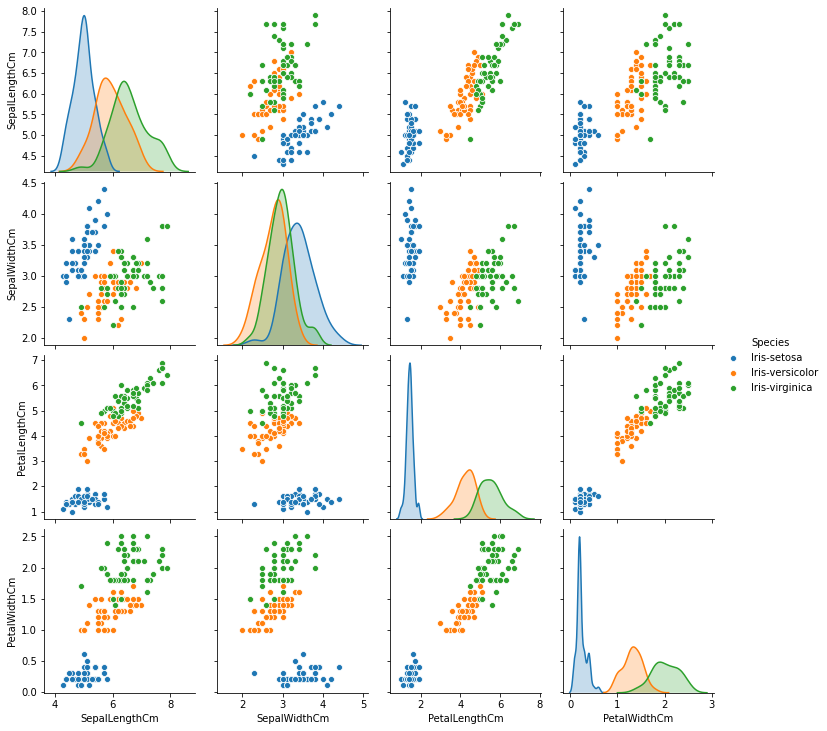

In [11]:
sns.pairplot(data = df, hue = "Species")

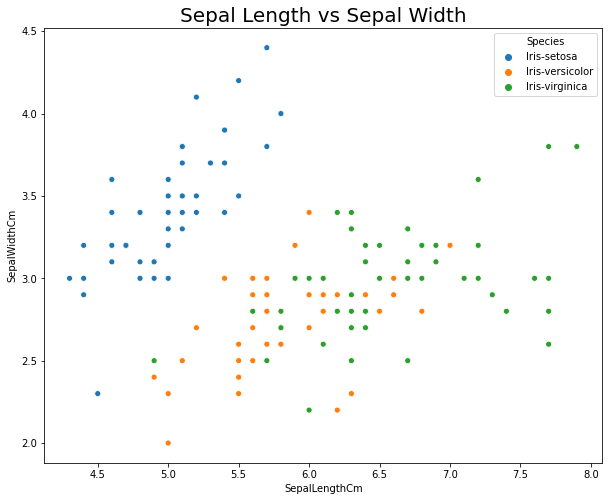

In [52]:
plt.figure(figsize = (10,8))
sns.scatterplot("SepalLengthCm", "SepalWidthCm", hue = "Species", data = df)
plt.title("Sepal Length vs Sepal Width", fontsize = 20)
plt.show()

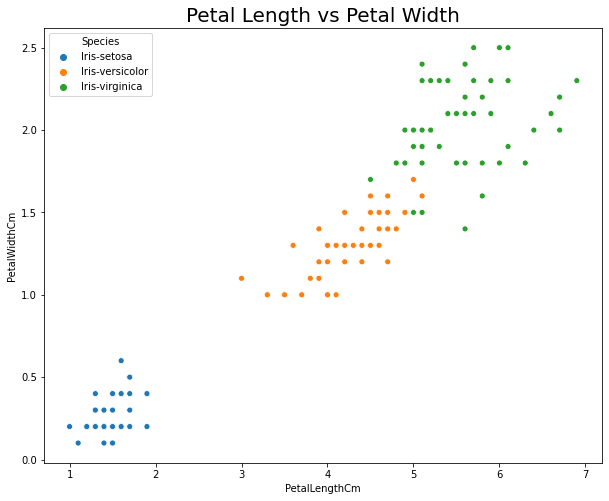

In [51]:
plt.figure(figsize = (10,8))
sns.scatterplot("PetalLengthCm", "PetalWidthCm", hue = "Species", data = df)
plt.title("Petal Length vs Petal Width", fontsize = 20)
plt.show()

In [18]:
X = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df["Species"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 33)
X_train.shape

(112, 4)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf = 5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
ac_score = accuracy_score(y_test, prediction)
print("accuracy score :", np.round(ac_score,4))

accuracy score : 0.9474


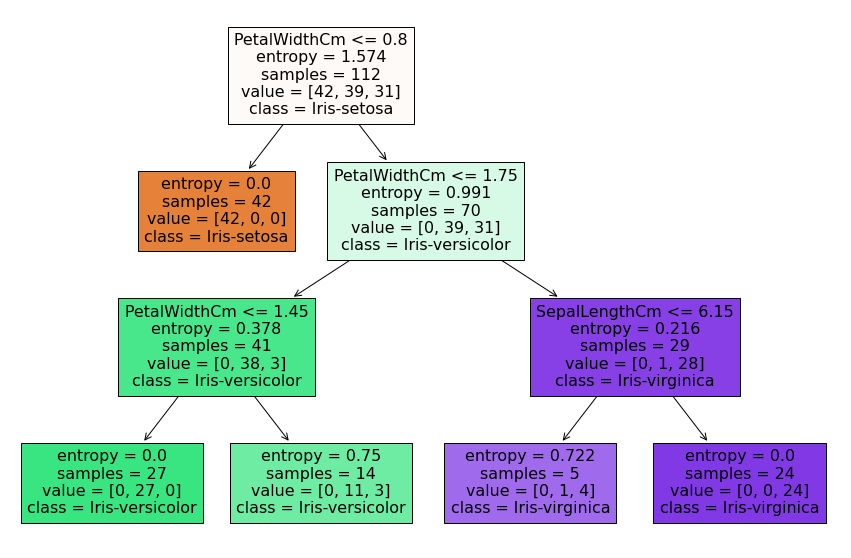

In [40]:
from sklearn import tree
feature_names = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)